# Temperature Analysis II

In [1]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables Into SQLAlchemy ORM

In [2]:
#create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
#reflect hawaii database
Base = automap_base()
Base.prepare(engine, reflect=True)

#view classes
Base.classes.keys()

['measurement', 'station']

In [4]:
#save reference to measurement class
Measurement = Base.classes.measurement

#save reference to station class
Station = Base.classes.station

In [5]:
#create session
session = Session(engine)

In [6]:
#calc_temps function given from instructor
#start_date (string): A date string in the format %Y-%m-%d
#end_date (string): A date string in the format %Y-%m-%d 
#Returns: TMIN, TAVG, and TMAX

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [10]:
#find data for Aug. 1 - Aug. 7 from a previous year
aug_2015_data = calc_temps('2015-08-01', '2015-08-07')
aug_2015_data

[(69.0, 78.27272727272727, 85.0)]

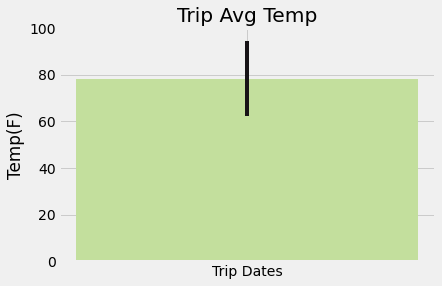

<Figure size 144x432 with 0 Axes>

In [45]:
#plot the aug_2015_data
aug_min = aug_2015_data[0][0]
aug_avg = aug_2015_data[0][1]
aug_max = aug_2015_data[0][2]
aug_ptp = aug_max - aug_min

plt.bar(1, aug_avg, width=0.2, color='#C3DF9D')
plt.title('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.xticks([1], labels=['Trip Dates'])
plt.ylim(0, 100)
plt.errorbar(1, aug_avg, yerr=aug_ptp, fmt='-', color='#171317')
plt.figure(figsize=(2, 6)) 

plt.show()